In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
file_name="clean_df.csv"
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


In [23]:
from sklearn.linear_model import LinearRegression 

In [25]:
lm = LinearRegression()
lm

LinearRegression()

In [27]:
X = df[['highway-L/100km']]
Y = df[['price']]

In [29]:
lm.fit(X,Y)

LinearRegression()

In [31]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([[15485.52737455],
       [15485.52737455],
       [16643.34931414],
       [12475.19033163],
       [22327.2024721 ]])

In [33]:
lm.intercept_

array([-14617.84305466])

In [35]:
lm.coef_

array([[3458.68511314]])

In [37]:
lm1 = LinearRegression()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  201 non-null    int64  
 3   make               201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [39]:
X = df[["engine-size"]]
Y = df[["price"]].replace('?',0).astype("float")
lm1.fit(X,Y)

LinearRegression()

In [41]:
lm1.coef_

array([[166.86001569]])

In [43]:
lm1.intercept_

array([-7963.33890628])

In [45]:
Price = -7685.46368071 + 162.59813402*df['engine-size']

In [49]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
df['horsepower'].replace('?',np.nan, inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(0, inplace=True)
df['horsepower'].astype(int)
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horsepower       201 non-null    int64  
 1   curb-weight      201 non-null    int64  
 2   engine-size      201 non-null    int64  
 3   highway-L/100km  201 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [51]:
df['price'].replace('?',np.nan, inplace=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].fillna(0, inplace=True)
df['price'].astype(float)
df["price"].dtype
lm.fit(Z, df['price'])

LinearRegression()

In [53]:
lm.intercept_

-14385.634549360104

In [55]:
lm.coef_

array([ 36.6377371 ,   3.50038215,  85.37370862, 500.51979785])

In [59]:
df['normalized-losses'].replace('?',np.nan,inplace=True)
pd.to_numeric(df['normalized-losses'] ,errors = 'coerce')
df['normalized-losses'].fillna(0, inplace=True)
df['normalized-losses'].astype(int)
lm2 = LinearRegression()
Z1 = df[["normalized-losses", "highway-L/100km"]]
lm2.fit(Z,df['price'])

LinearRegression()

In [61]:
lm2.coef_

array([ 36.6377371 ,   3.50038215,  85.37370862, 500.51979785])

In [63]:
# Model Visualization

import seaborn as sns
%matplotlib inline 

(0.0, 47710.346586846455)

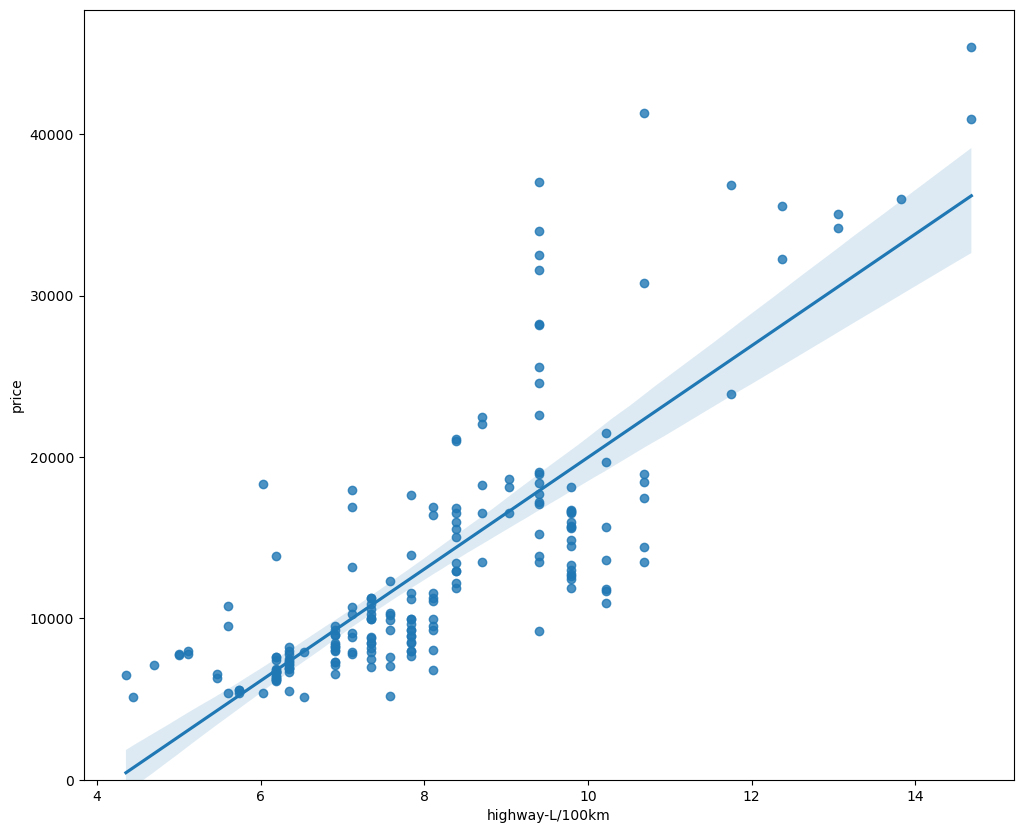

In [67]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

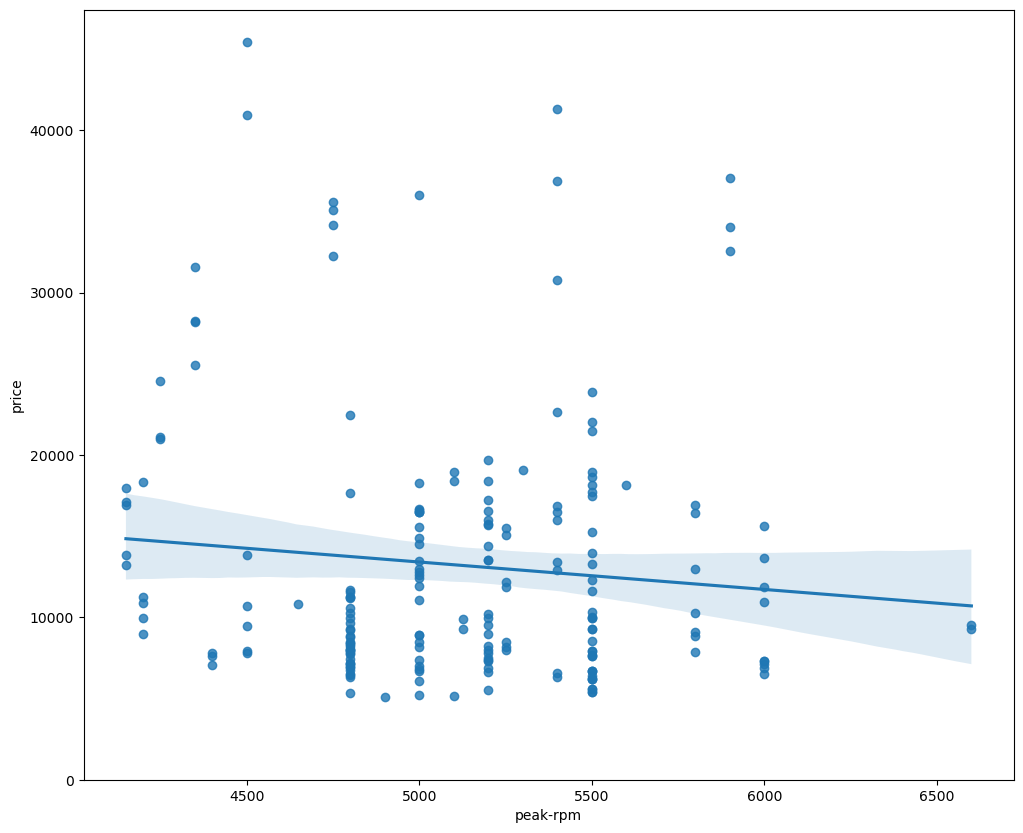

In [69]:
df['peak-rpm'].replace('?',np.nan, inplace=True)
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')
df['peak-rpm'].fillna(0, inplace=True)
df['peak-rpm'].astype(int)
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [71]:
arr = ['peak-rpm', 'highway-L/100km']
for var in arr:
    print(f"The correlation of {var} with price is:",df[[var, 'price']].corr())

The correlation of peak-rpm with price is:           peak-rpm     price
peak-rpm  1.000000 -0.101616
price    -0.101616  1.000000
The correlation of highway-L/100km with price is:                  highway-L/100km     price
highway-L/100km         1.000000  0.801118
price                   0.801118  1.000000


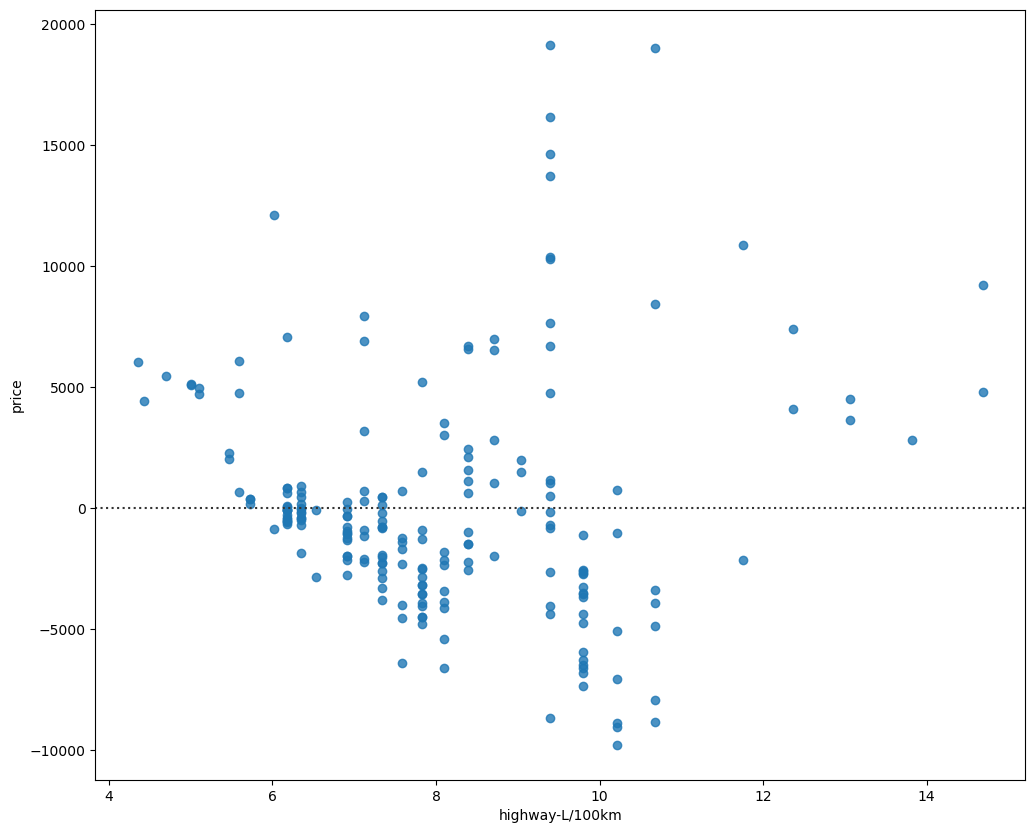

In [73]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-L/100km'], y=df['price'])
plt.show()

In [75]:
# Visual Modelling of multiple linear regression
Y_hat = lm.predict(Z)

/tmp/ipykernel_7012/4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_7012/4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` 

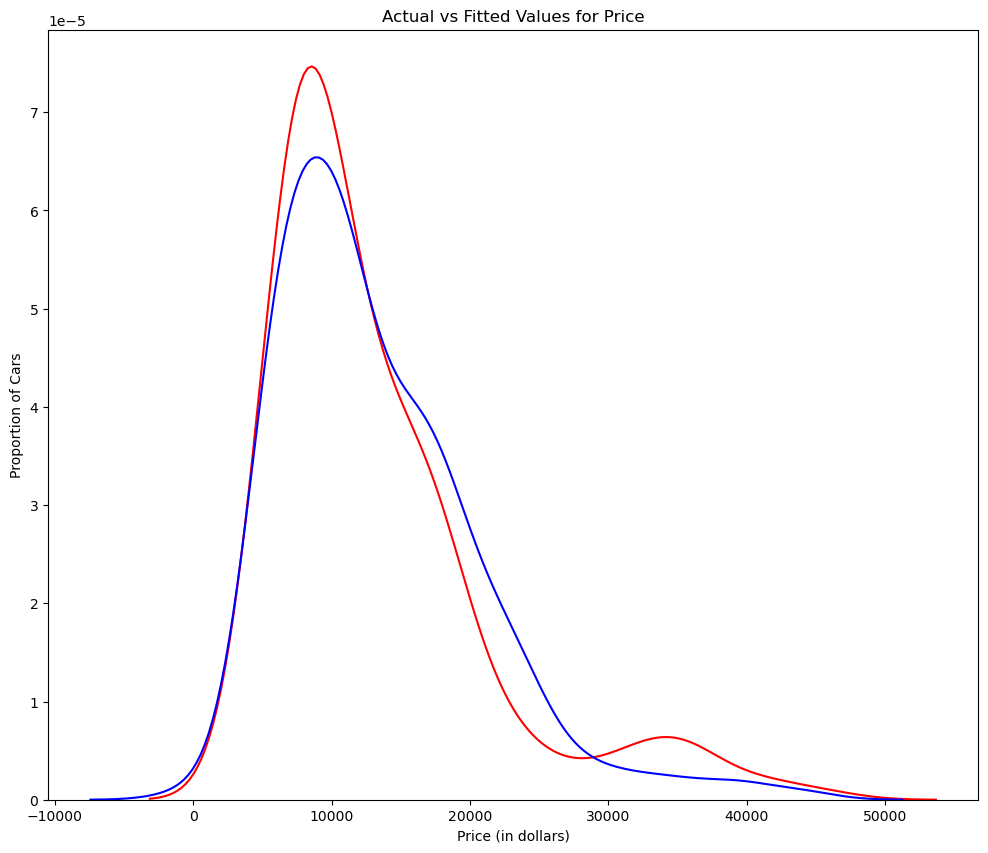

In [77]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [81]:
x = df['highway-L/100km']
y = df['price']

In [83]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


In [85]:
PlotPolly(p, x, y, 'highway-L/100km ')

NameError: name 'PlotPolly' is not defined

In [87]:
np.polyfit(x, y, 3)

array([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

In [91]:
a = np.polyfit(x,y,11)
b= np.poly1d(a)
print(a)
PlotPolly(b,x,y, 'highway-L/100km')

[ 3.54538975e-03 -4.73279292e-01  2.68683313e+01 -8.70269206e+02
  1.80307360e+04 -2.52270648e+05  2.44069198e+06 -1.63682683e+07
  7.47019258e+07 -2.21263477e+08  3.83240068e+08 -2.94343149e+08]


NameError: name 'PlotPolly' is not defined

In [ ]:
# For multivariate polynomial function

In [93]:
from sklearn.preprocessing import PolynomialFeatures

In [95]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [97]:
Z_pr=pr.fit_transform(Z)

In [99]:
Z.shape

(201, 4)

In [101]:
Z_pr.shape

(201, 15)

In [ ]:
# Pipelines

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [107]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [109]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [111]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12395.58706934, 12395.58706934, 18422.45365339,  9979.7757077 ])

In [113]:
# a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.
input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(input)
pipe.fit(Z,y)
ypipe = pipe.predict(Z)
ypipe[0:10]

array([14055.08612634, 14055.08612634, 18638.8884263 , 10758.2803759 ,
       16670.07025864, 14735.68505426, 15915.31383891, 16300.35587545,
       18610.89141407, 10974.48897133])

In [123]:
# R-squared
#highway-L/100km_fit
?# Find the R^2
# print('The R-square is: ', lm.score(x, y))

Object `# Find the R^2` not found.


In [125]:
# MSE
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [127]:
from sklearn.metrics import mean_squared_error

In [129]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


In [131]:
# R-squared for multiple linear regression models
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.811811561534475


In [133]:
# MSE multiple
Y_predict_multifit = lm.predict(Z)

In [135]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11826072.956532085


In [137]:
# R-squared for polynomial fit
from sklearn.metrics import r2_score

In [139]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6753581660812172


In [141]:
# MSE
mean_squared_error(df['price'], p(x))

20401030.180019394

In [143]:
# Prediction and decision making
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [145]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [147]:
lm.fit(X, Y)
lm

LinearRegression()

In [149]:
yhat=lm.predict(new_input)
yhat[0:5]

/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

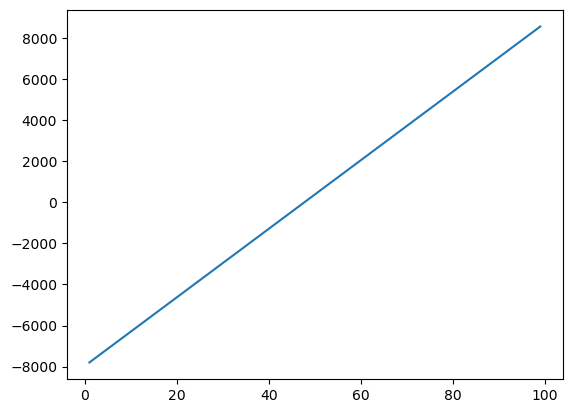

In [151]:
plt.plot(new_input, yhat)
plt.show()